In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [2]:
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

Reading CSV files

In [3]:
cts = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\clicks_train_sample.csv')
dc = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\documents_categories.csv')
de = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\documents_entities.csv')
dm = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\documents_meta.csv')
dt = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\documents_topics.csv')
ev = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\events.csv')
pgv = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\page_views_newsample.csv')
pc = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\promoted_content.csv')

E:\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Merging CSV files

In [4]:
# Merge events with documents_meta using document_id
evdm = pd.merge(ev, dm, on='document_id')
evdm

display_id            uuid  document_id   timestamp platform  \
0                  1  cb8c55702adb93       379743          61        3   
1            1239772  a2eb3a4e0a4c08       379743    74476960        1   
2            1306670  c9d0cf076200f3       379743    78297892        2   
3            2357895  6e0aabe592ba61       379743   148985378        2   
4            2785946  1eb4bef36f8623       379743   177159039        1   
...              ...             ...          ...         ...      ...   
23120121    23119969  15a573f86dfeb6      2994282  1295990472        2   
23120122    23120028  f3eae20e5f3320       897027  1295994117        1   
23120123    23120059  bffdaa000741da      2997881  1295995517        2   
23120124    23120067  f71c55144e077d       849598  1295996093        2   
23120125    23120081  68f52117b72501      2977263  1295997003        2   

         geo_location  source_id  publisher_id         publish_time  
0           US>SC>519     6482.0          24.0                  NaN  
1               CA>BC     6482.0          24.0                  NaN  
2                  US     6482.0          24.0                  NaN  
3                  US     6482.0          24.0                  NaN  
4           US>RI>521     6482.0          24.0                  NaN  
...               ...        ...           ...                  ...  
23120121    US>CA>862     2578.0         218.0  2016-06-28 22:00:00  
23120122    US>IN>602    10202.0           9.0  2014-09-29 00:00:00  
23120123           US      798.0         435.0  2016-06-28 23:00:00  
23120124    US>WV>559     2441.0         289.0  2015-09-08 18:00:00  
23120125    US>TX>618    10030.0        1089.0  2016-06-28 17:00:00  

[23120126 rows x 9 columns]

In [5]:
# Merge events & documents_meta dataframe with click_trains_sample
evdmcts = pd.merge(evdm, cts, on='display_id')
evdmcts

display_id            uuid  document_id   timestamp platform  \
0            34922  6288e67b1d54c6      1794259     2600122        2   
1            36471  54d8dfb74dcef5      1794259     2729315        2   
2            69037  eb345ac48eaa11      1794259     5686447        2   
3            78208  d53551d0b23d67      1794259     6606779        2   
4            94115  cfd33e4e9e05b5      1794259     8259821        1   
...            ...             ...          ...         ...      ...   
999995    16873858  241b25e794bb96      1318775  1123148136        3   
999996    16873865  82cb25078d7865      1653851  1123148476        2   
999997    16874363  1a9b29a1803752       160751  1123183893        3   
999998    16874364  b983ed36310309      2825696  1123183926        2   
999999    16874525  d779ae4cfe3100      2681997  1123195210        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>FL>548       93.0         407.0  2016-06-14 00:00:00   12650   
2         US>IL>602       93.0         407.0  2016-06-14 00:00:00   92369   
3         US>CA>803       93.0         407.0  2016-06-14 00:00:00   37156   
4         US>WA>819       93.0         407.0  2016-06-14 00:00:00  275295   
...             ...        ...           ...                  ...     ...   
999995        CA>ON      366.0         781.0  2016-04-19 14:00:00  305682   
999996    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   
999997    US>FL>539     8894.0         469.0                  NaN  155508   
999998    US>TX>618      247.0         236.0  2016-06-27 00:00:00  250319   
999999    US>OH>564     6809.0         388.0  2016-06-24 12:00:00   84937   

        clicked  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
999995        0  
999996        0  
999997        0  
999998        1  
999999        0  

[1000000 rows x 11 columns]

In [6]:
# Merge events & documents_meta & click_trains_sample 
evdmctspc = pd.merge(evdmcts, pc, on='ad_id')
evdmctspc

display_id            uuid  document_id_x   timestamp platform  \
0            34922  6288e67b1d54c6        1794259     2600122        2   
1          3982567  f90db73a75332d        1060089   253476258        1   
2          7604922  9853a49f80e2f8        1303771   520980585        2   
3          1439583  e4d4a17cf8c7e6        1667632    86010864        2   
4          3522033  4789ccff327551        1601704   228163963        2   
...            ...             ...            ...         ...      ...   
999995    16841692  d2e3542e47da0e         624053  1121126231        1   
999996    16866762  68ec61d8fa368f        2824990  1122675040        3   
999997    16859782  cf08c047cfc412        1073469  1122222637        2   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   
999999    16873865  82cb25078d7865        1653851  1123148476        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   37851   
2         US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   37851   
3         US>WA>819     7267.0          58.0  2016-06-08 00:00:00   37851   
4                US    12705.0        1044.0  2016-06-03 17:00:00   37851   
...             ...        ...           ...                  ...     ...   
999995        CA>AB     8179.0         142.0                  NaN  546594   
999996    US>WY>759     7270.0          58.0  2016-06-26 23:00:00  498206   
999997        CA>ON      105.0         206.0  2016-02-01 12:00:00   32520   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   
999999    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   

        clicked  document_id_y  campaign_id  advertiser_id  
0             0         298547         5342            580  
1             0         298547         5342            580  
2             0         298547         5342            580  
3             0         298547         5342            580  
4             0         298547         5342            580  
...         ...            ...          ...            ...  
999995        0        1125673        11340           1882  
999996        0        2440858        32867            210  
999997        0         860793         4789            580  
999998        0        2811782        34380           2884  
999999        0        1469263        27382           2668  

[1000000 rows x 14 columns]

In [7]:
# Copying the orginal dataframe we going to use for safety
df = evdmctspc.copy()
df

display_id            uuid  document_id_x   timestamp platform  \
0            34922  6288e67b1d54c6        1794259     2600122        2   
1          3982567  f90db73a75332d        1060089   253476258        1   
2          7604922  9853a49f80e2f8        1303771   520980585        2   
3          1439583  e4d4a17cf8c7e6        1667632    86010864        2   
4          3522033  4789ccff327551        1601704   228163963        2   
...            ...             ...            ...         ...      ...   
999995    16841692  d2e3542e47da0e         624053  1121126231        1   
999996    16866762  68ec61d8fa368f        2824990  1122675040        3   
999997    16859782  cf08c047cfc412        1073469  1122222637        2   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   
999999    16873865  82cb25078d7865        1653851  1123148476        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   37851   
2         US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   37851   
3         US>WA>819     7267.0          58.0  2016-06-08 00:00:00   37851   
4                US    12705.0        1044.0  2016-06-03 17:00:00   37851   
...             ...        ...           ...                  ...     ...   
999995        CA>AB     8179.0         142.0                  NaN  546594   
999996    US>WY>759     7270.0          58.0  2016-06-26 23:00:00  498206   
999997        CA>ON      105.0         206.0  2016-02-01 12:00:00   32520   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   
999999    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   

        clicked  document_id_y  campaign_id  advertiser_id  
0             0         298547         5342            580  
1             0         298547         5342            580  
2             0         298547         5342            580  
3             0         298547         5342            580  
4             0         298547         5342            580  
...         ...            ...          ...            ...  
999995        0        1125673        11340           1882  
999996        0        2440858        32867            210  
999997        0         860793         4789            580  
999998        0        2811782        34380           2884  
999999        0        1469263        27382           2668  

[1000000 rows x 14 columns]

In [27]:
# Copying the orginal dataframe we going to use for safety again
df2 = evdmctspc.copy()

In [9]:
# Getting rid of any nulls
df.isnull().sum()

display_id            0
uuid                  0
document_id_x         0
timestamp             0
platform              0
geo_location         18
source_id            18
publisher_id         18
publish_time     139675
ad_id                 0
clicked               0
document_id_y         0
campaign_id           0
advertiser_id         0
dtype: int64

In [10]:
# dataframe without any nulls
df.dropna()

display_id            uuid  document_id_x   timestamp platform  \
0            34922  6288e67b1d54c6        1794259     2600122        2   
1          3982567  f90db73a75332d        1060089   253476258        1   
2          7604922  9853a49f80e2f8        1303771   520980585        2   
3          1439583  e4d4a17cf8c7e6        1667632    86010864        2   
4          3522033  4789ccff327551        1601704   228163963        2   
...            ...             ...            ...         ...      ...   
999994    16846914  f4c6b798d19d38         203632  1121438640        1   
999996    16866762  68ec61d8fa368f        2824990  1122675040        3   
999997    16859782  cf08c047cfc412        1073469  1122222637        2   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   
999999    16873865  82cb25078d7865        1653851  1123148476        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   37851   
2         US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   37851   
3         US>WA>819     7267.0          58.0  2016-06-08 00:00:00   37851   
4                US    12705.0        1044.0  2016-06-03 17:00:00   37851   
...             ...        ...           ...                  ...     ...   
999994    US>MA>506    10033.0         183.0  2013-11-24 00:00:00  497028   
999996    US>WY>759     7270.0          58.0  2016-06-26 23:00:00  498206   
999997        CA>ON      105.0         206.0  2016-02-01 12:00:00   32520   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   
999999    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   

        clicked  document_id_y  campaign_id  advertiser_id  
0             0         298547         5342            580  
1             0         298547         5342            580  
2             0         298547         5342            580  
3             0         298547         5342            580  
4             0         298547         5342            580  
...         ...            ...          ...            ...  
999994        0        2433561        32813           2447  
999996        0        2440858        32867            210  
999997        0         860793         4789            580  
999998        0        2811782        34380           2884  
999999        0        1469263        27382           2668  

[860296 rows x 14 columns]

In [14]:
# Copying the dataframe with no nulls - fix that later
dfnonulls = df.copy()

Cleaning the dataframe

In [11]:
df.clicked.value_counts()

0    806163
1    193837
Name: clicked, dtype: int64

Checking the platform column 

In [12]:
df.platform.value_counts()

1    412028
2    407634
3    141499
1     18299
2     15258
3      5282
Name: platform, dtype: int64

Performing the str strip in the platform column 

In [13]:
df.platform = df.platform.str.strip()

Running the value counts again for platform column

In [14]:
df.platform.value_counts()

1    18299
2    15258
3     5282
Name: platform, dtype: int64

In [14]:
#checking it by copying it onto Excel 
df.platform.value_counts().to_clipboard()

In [17]:
df.groupby('platform')['clicked'].sum()

platform
1    3178
2    3462
3     957
Name: clicked, dtype: int64

In [15]:
df[timecolumn] = pd.to_datetime(time value, unit=‘ms’
But first we have to add 1465876799998 to the timestamp
pd.Timestamp(1513393355.5, unit='s')

SyntaxError: invalid syntax (<ipython-input-15-9270a86c53d7>, line 1)

In [24]:
df['timestamp2'] = pd.Timestamp(df['timestamp'], unit='ms')

TypeError: Cannot convert input [0        2016-06-14 03:59:59.998
1        2016-06-14 03:59:59.998
2        2016-06-14 03:59:59.998
3        2016-06-14 03:59:59.998
4        2016-06-14 03:59:59.998
                   ...          
999995   2016-06-14 03:59:59.998
999996   2016-06-14 03:59:59.998
999997   2016-06-14 03:59:59.998
999998   2016-06-14 03:59:59.998
999999   2016-06-14 03:59:59.998
Name: timestamp, Length: 1000000, dtype: datetime64[ns]] of type <class 'pandas.core.series.Series'> to Timestamp

In [19]:
df

display_id            uuid  document_id_x               timestamp  \
0            34922  6288e67b1d54c6        1794259 2016-06-14 03:59:59.998   
1          3982567  f90db73a75332d        1060089 2016-06-14 03:59:59.998   
2          7604922  9853a49f80e2f8        1303771 2016-06-14 03:59:59.998   
3          1439583  e4d4a17cf8c7e6        1667632 2016-06-14 03:59:59.998   
4          3522033  4789ccff327551        1601704 2016-06-14 03:59:59.998   
...            ...             ...            ...                     ...   
999995    16841692  d2e3542e47da0e         624053 2016-06-14 03:59:59.998   
999996    16866762  68ec61d8fa368f        2824990 2016-06-14 03:59:59.998   
999997    16859782  cf08c047cfc412        1073469 2016-06-14 03:59:59.998   
999998    16870073  a06a4e9ca33248         385256 2016-06-14 03:59:59.998   
999999    16873865  82cb25078d7865        1653851 2016-06-14 03:59:59.998   

       platform geo_location  source_id  publisher_id         publish_time  \
0           NaN    US>TX>623       93.0         407.0  2016-06-14 00:00:00   
1           NaN    US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   
2           NaN    US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   
3           NaN    US>WA>819     7267.0          58.0  2016-06-08 00:00:00   
4           NaN           US    12705.0        1044.0  2016-06-03 17:00:00   
...         ...          ...        ...           ...                  ...   
999995      NaN        CA>AB     8179.0         142.0                  NaN   
999996      NaN    US>WY>759     7270.0          58.0  2016-06-26 23:00:00   
999997      NaN        CA>ON      105.0         206.0  2016-02-01 12:00:00   
999998      NaN    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00   
999999      NaN    US>MN>613      982.0          33.0  2016-06-07 19:00:00   

         ad_id  clicked  document_id_y  campaign_id  advertiser_id  
0        37851        0         298547         5342            580  
1        37851        0         298547         5342            580  
2        37851        0         298547         5342            580  
3        37851        0         298547         5342            580  
4        37851        0         298547         5342            580  
...        ...      ...            ...          ...            ...  
999995  546594        0        1125673        11340           1882  
999996  498206        0        2440858        32867            210  
999997   32520        0         860793         4789            580  
999998  546961        0        2811782        34380           2884  
999999  277464        0        1469263        27382           2668  

[1000000 rows x 14 columns]

In [31]:
df2['timestamp2'] = pd.Timestamp(df2['timestamp'] + 1465876799998, unit='ms')

TypeError: Cannot convert input [0         1465879400120
1         1466130276256
2         1466397780583
3         1465962810862
4         1466104963961
              ...      
999995    1466997926229
999996    1466999475038
999997    1466999022635
999998    1466999691561
999999    1466999948474
Name: timestamp, Length: 1000000, dtype: int64] of type <class 'pandas.core.series.Series'> to Timestamp

In [32]:
df2['timestamp'] + 1465876799998

0         1465879400120
1         1466130276256
2         1466397780583
3         1465962810862
4         1466104963961
              ...      
999995    1466997926229
999996    1466999475038
999997    1466999022635
999998    1466999691561
999999    1466999948474
Name: timestamp, Length: 1000000, dtype: int64

In [47]:
pd.Timestamp([1465879400120], unit='ms')

Timestamp('2016-06-14 04:43:20.120000')

In [34]:
pd.Timestamp([1465879400120], unit='ms')

TypeError: Cannot convert input [[1465879400120]] of type <class 'list'> to Timestamp

In [42]:
(df2['timestamp'] + 1465876799998).apply(lambda t: pd.Timestamp(t, unit= 'ms')).dt.dayofweek

0         1
1         4
2         0
3         2
4         3
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Name: timestamp, Length: 1000000, dtype: int64

In [45]:
df2['dayofweek'] = (df2['timestamp'] + 1465876799998).apply(lambda t: pd.Timestamp(t, unit= 'ms')).dt.dayofweek

In [46]:
df2

display_id            uuid  document_id_x   timestamp platform  \
0            34922  6288e67b1d54c6        1794259     2600122        2   
1          3982567  f90db73a75332d        1060089   253476258        1   
2          7604922  9853a49f80e2f8        1303771   520980585        2   
3          1439583  e4d4a17cf8c7e6        1667632    86010864        2   
4          3522033  4789ccff327551        1601704   228163963        2   
...            ...             ...            ...         ...      ...   
999995    16841692  d2e3542e47da0e         624053  1121126231        1   
999996    16866762  68ec61d8fa368f        2824990  1122675040        3   
999997    16859782  cf08c047cfc412        1073469  1122222637        2   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   
999999    16873865  82cb25078d7865        1653851  1123148476        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   37851   
2         US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   37851   
3         US>WA>819     7267.0          58.0  2016-06-08 00:00:00   37851   
4                US    12705.0        1044.0  2016-06-03 17:00:00   37851   
...             ...        ...           ...                  ...     ...   
999995        CA>AB     8179.0         142.0                  NaN  546594   
999996    US>WY>759     7270.0          58.0  2016-06-26 23:00:00  498206   
999997        CA>ON      105.0         206.0  2016-02-01 12:00:00   32520   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   
999999    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   

        clicked  document_id_y  campaign_id  advertiser_id  dayofweek  
0             0         298547         5342            580          1  
1             0         298547         5342            580          4  
2             0         298547         5342            580          0  
3             0         298547         5342            580          2  
4             0         298547         5342            580          3  
...         ...            ...          ...            ...        ...  
999995        0        1125673        11340           1882          0  
999996        0        2440858        32867            210          0  
999997        0         860793         4789            580          0  
999998        0        2811782        34380           2884          0  
999999        0        1469263        27382           2668          0  

[1000000 rows x 15 columns]

In [48]:
df2['hourofday'] = (df2['timestamp'] + 1465876799998).apply(lambda t: pd.Timestamp(t, unit= 'ms')).dt.hour

In [51]:
df2

display_id            uuid  document_id_x   timestamp platform  \
0            34922  6288e67b1d54c6        1794259     2600122        2   
1          3982567  f90db73a75332d        1060089   253476258        1   
2          7604922  9853a49f80e2f8        1303771   520980585        2   
3          1439583  e4d4a17cf8c7e6        1667632    86010864        2   
4          3522033  4789ccff327551        1601704   228163963        2   
...            ...             ...            ...         ...      ...   
999995    16841692  d2e3542e47da0e         624053  1121126231        1   
999996    16866762  68ec61d8fa368f        2824990  1122675040        3   
999997    16859782  cf08c047cfc412        1073469  1122222637        2   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   
999999    16873865  82cb25078d7865        1653851  1123148476        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   37851   
2         US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   37851   
3         US>WA>819     7267.0          58.0  2016-06-08 00:00:00   37851   
4                US    12705.0        1044.0  2016-06-03 17:00:00   37851   
...             ...        ...           ...                  ...     ...   
999995        CA>AB     8179.0         142.0                  NaN  546594   
999996    US>WY>759     7270.0          58.0  2016-06-26 23:00:00  498206   
999997        CA>ON      105.0         206.0  2016-02-01 12:00:00   32520   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   
999999    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   

        clicked  document_id_y  campaign_id  advertiser_id  dayofweek  \
0             0         298547         5342            580          1   
1             0         298547         5342            580          4   
2             0         298547         5342            580          0   
3             0         298547         5342            580          2   
4             0         298547         5342            580          3   
...         ...            ...          ...            ...        ...   
999995        0        1125673        11340           1882          0   
999996        0        2440858        32867            210          0   
999997        0         860793         4789            580          0   
999998        0        2811782        34380           2884          0   
999999        0        1469263        27382           2668          0   

        hourofday     timestamp1  
0               4  1465879400120  
1               2  1466130276256  
2               4  1466397780583  
3               3  1465962810862  
4              19  1466104963961  
...           ...            ...  
999995          3  1466997926229  
999996          3  1466999475038  
999997          3  1466999022635  
999998          3  1466999691561  
999999          3  1466999948474  

[1000000 rows x 17 columns]

In [49]:
df2

display_id            uuid  document_id_x   timestamp platform  \
0            34922  6288e67b1d54c6        1794259     2600122        2   
1          3982567  f90db73a75332d        1060089   253476258        1   
2          7604922  9853a49f80e2f8        1303771   520980585        2   
3          1439583  e4d4a17cf8c7e6        1667632    86010864        2   
4          3522033  4789ccff327551        1601704   228163963        2   
...            ...             ...            ...         ...      ...   
999995    16841692  d2e3542e47da0e         624053  1121126231        1   
999996    16866762  68ec61d8fa368f        2824990  1122675040        3   
999997    16859782  cf08c047cfc412        1073469  1122222637        2   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   
999999    16873865  82cb25078d7865        1653851  1123148476        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   37851   
2         US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   37851   
3         US>WA>819     7267.0          58.0  2016-06-08 00:00:00   37851   
4                US    12705.0        1044.0  2016-06-03 17:00:00   37851   
...             ...        ...           ...                  ...     ...   
999995        CA>AB     8179.0         142.0                  NaN  546594   
999996    US>WY>759     7270.0          58.0  2016-06-26 23:00:00  498206   
999997        CA>ON      105.0         206.0  2016-02-01 12:00:00   32520   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   
999999    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   

        clicked  document_id_y  campaign_id  advertiser_id  dayofweek  \
0             0         298547         5342            580          1   
1             0         298547         5342            580          4   
2             0         298547         5342            580          0   
3             0         298547         5342            580          2   
4             0         298547         5342            580          3   
...         ...            ...          ...            ...        ...   
999995        0        1125673        11340           1882          0   
999996        0        2440858        32867            210          0   
999997        0         860793         4789            580          0   
999998        0        2811782        34380           2884          0   
999999        0        1469263        27382           2668          0   

        hourofday  
0               4  
1               2  
2               4  
3               3  
4              19  
...           ...  
999995          3  
999996          3  
999997          3  
999998          3  
999999          3  

[1000000 rows x 16 columns]

In [57]:
df2['timestamp1'] = df2['timestamp1'].apply(lambda t: pd.Timestamp(t, unit= 'ms'))   #(df2['timestamp'] + 1465876799998) 
df2

display_id            uuid  document_id_x   timestamp platform  \
0            34922  6288e67b1d54c6        1794259     2600122        2   
1          3982567  f90db73a75332d        1060089   253476258        1   
2          7604922  9853a49f80e2f8        1303771   520980585        2   
3          1439583  e4d4a17cf8c7e6        1667632    86010864        2   
4          3522033  4789ccff327551        1601704   228163963        2   
...            ...             ...            ...         ...      ...   
999995    16841692  d2e3542e47da0e         624053  1121126231        1   
999996    16866762  68ec61d8fa368f        2824990  1122675040        3   
999997    16859782  cf08c047cfc412        1073469  1122222637        2   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   
999999    16873865  82cb25078d7865        1653851  1123148476        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   37851   
2         US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   37851   
3         US>WA>819     7267.0          58.0  2016-06-08 00:00:00   37851   
4                US    12705.0        1044.0  2016-06-03 17:00:00   37851   
...             ...        ...           ...                  ...     ...   
999995        CA>AB     8179.0         142.0                  NaN  546594   
999996    US>WY>759     7270.0          58.0  2016-06-26 23:00:00  498206   
999997        CA>ON      105.0         206.0  2016-02-01 12:00:00   32520   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   
999999    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   

        clicked  document_id_y  campaign_id  advertiser_id  dayofweek  \
0             0         298547         5342            580          1   
1             0         298547         5342            580          4   
2             0         298547         5342            580          0   
3             0         298547         5342            580          2   
4             0         298547         5342            580          3   
...         ...            ...          ...            ...        ...   
999995        0        1125673        11340           1882          0   
999996        0        2440858        32867            210          0   
999997        0         860793         4789            580          0   
999998        0        2811782        34380           2884          0   
999999        0        1469263        27382           2668          0   

        hourofday              timestamp1  
0               4 2016-06-14 04:43:20.120  
1               2 2016-06-17 02:24:36.256  
2               4 2016-06-20 04:43:00.583  
3               3 2016-06-15 03:53:30.862  
4              19 2016-06-16 19:22:43.961  
...           ...                     ...  
999995          3 2016-06-27 03:25:26.229  
999996          3 2016-06-27 03:51:15.038  
999997          3 2016-06-27 03:43:42.635  
999998          3 2016-06-27 03:54:51.561  
999999          3 2016-06-27 03:59:08.474  

[1000000 rows x 17 columns]

In [59]:
df2['month'] = (df2['timestamp'] + 1465876799998).apply(lambda t: pd.Timestamp(t, unit= 'ms')).dt.month
df2

display_id            uuid  document_id_x   timestamp platform  \
0            34922  6288e67b1d54c6        1794259     2600122        2   
1          3982567  f90db73a75332d        1060089   253476258        1   
2          7604922  9853a49f80e2f8        1303771   520980585        2   
3          1439583  e4d4a17cf8c7e6        1667632    86010864        2   
4          3522033  4789ccff327551        1601704   228163963        2   
...            ...             ...            ...         ...      ...   
999995    16841692  d2e3542e47da0e         624053  1121126231        1   
999996    16866762  68ec61d8fa368f        2824990  1122675040        3   
999997    16859782  cf08c047cfc412        1073469  1122222637        2   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   
999999    16873865  82cb25078d7865        1653851  1123148476        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   37851   
2         US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   37851   
3         US>WA>819     7267.0          58.0  2016-06-08 00:00:00   37851   
4                US    12705.0        1044.0  2016-06-03 17:00:00   37851   
...             ...        ...           ...                  ...     ...   
999995        CA>AB     8179.0         142.0                  NaN  546594   
999996    US>WY>759     7270.0          58.0  2016-06-26 23:00:00  498206   
999997        CA>ON      105.0         206.0  2016-02-01 12:00:00   32520   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   
999999    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   

        clicked  document_id_y  campaign_id  advertiser_id  dayofweek  \
0             0         298547         5342            580          1   
1             0         298547         5342            580          4   
2             0         298547         5342            580          0   
3             0         298547         5342            580          2   
4             0         298547         5342            580          3   
...         ...            ...          ...            ...        ...   
999995        0        1125673        11340           1882          0   
999996        0        2440858        32867            210          0   
999997        0         860793         4789            580          0   
999998        0        2811782        34380           2884          0   
999999        0        1469263        27382           2668          0   

        hourofday              timestamp1  month  
0               4 2016-06-14 04:43:20.120      6  
1               2 2016-06-17 02:24:36.256      6  
2               4 2016-06-20 04:43:00.583      6  
3               3 2016-06-15 03:53:30.862      6  
4              19 2016-06-16 19:22:43.961      6  
...           ...                     ...    ...  
999995          3 2016-06-27 03:25:26.229      6  
999996          3 2016-06-27 03:51:15.038      6  
999997          3 2016-06-27 03:43:42.635      6  
999998          3 2016-06-27 03:54:51.561      6  
999999          3 2016-06-27 03:59:08.474      6  

[1000000 rows x 18 columns]

testing stuff

In [67]:
df2['year'] = (df2['timestamp'] + 1465876799998).apply(lambda t: pd.Timestamp(t, unit= 'ms')).dt.year
df2

display_id            uuid  document_id_x   timestamp platform  \
0            34922  6288e67b1d54c6        1794259     2600122        2   
1          3982567  f90db73a75332d        1060089   253476258        1   
2          7604922  9853a49f80e2f8        1303771   520980585        2   
3          1439583  e4d4a17cf8c7e6        1667632    86010864        2   
4          3522033  4789ccff327551        1601704   228163963        2   
...            ...             ...            ...         ...      ...   
999995    16841692  d2e3542e47da0e         624053  1121126231        1   
999996    16866762  68ec61d8fa368f        2824990  1122675040        3   
999997    16859782  cf08c047cfc412        1073469  1122222637        2   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   
999999    16873865  82cb25078d7865        1653851  1123148476        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   37851   
2         US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   37851   
3         US>WA>819     7267.0          58.0  2016-06-08 00:00:00   37851   
4                US    12705.0        1044.0  2016-06-03 17:00:00   37851   
...             ...        ...           ...                  ...     ...   
999995        CA>AB     8179.0         142.0                  NaN  546594   
999996    US>WY>759     7270.0          58.0  2016-06-26 23:00:00  498206   
999997        CA>ON      105.0         206.0  2016-02-01 12:00:00   32520   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   
999999    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   

        clicked  document_id_y  campaign_id  advertiser_id  dayofweek  \
0             0         298547         5342            580          1   
1             0         298547         5342            580          4   
2             0         298547         5342            580          0   
3             0         298547         5342            580          2   
4             0         298547         5342            580          3   
...         ...            ...          ...            ...        ...   
999995        0        1125673        11340           1882          0   
999996        0        2440858        32867            210          0   
999997        0         860793         4789            580          0   
999998        0        2811782        34380           2884          0   
999999        0        1469263        27382           2668          0   

        hourofday              timestamp1  month  year  
0               4 2016-06-14 04:43:20.120      6  2016  
1               2 2016-06-17 02:24:36.256      6  2016  
2               4 2016-06-20 04:43:00.583      6  2016  
3               3 2016-06-15 03:53:30.862      6  2016  
4              19 2016-06-16 19:22:43.961      6  2016  
...           ...                     ...    ...   ...  
999995          3 2016-06-27 03:25:26.229      6  2016  
999996          3 2016-06-27 03:51:15.038      6  2016  
999997          3 2016-06-27 03:43:42.635      6  2016  
999998          3 2016-06-27 03:54:51.561      6  2016  
999999          3 2016-06-27 03:59:08.474      6  2016  

[1000000 rows x 19 columns]

In [68]:
df2['minute'] = (df2['timestamp'] + 1465876799998).apply(lambda t: pd.Timestamp(t, unit= 'ms')).dt.minute
df2

display_id            uuid  document_id_x   timestamp platform  \
0            34922  6288e67b1d54c6        1794259     2600122        2   
1          3982567  f90db73a75332d        1060089   253476258        1   
2          7604922  9853a49f80e2f8        1303771   520980585        2   
3          1439583  e4d4a17cf8c7e6        1667632    86010864        2   
4          3522033  4789ccff327551        1601704   228163963        2   
...            ...             ...            ...         ...      ...   
999995    16841692  d2e3542e47da0e         624053  1121126231        1   
999996    16866762  68ec61d8fa368f        2824990  1122675040        3   
999997    16859782  cf08c047cfc412        1073469  1122222637        2   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   
999999    16873865  82cb25078d7865        1653851  1123148476        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   37851   
2         US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   37851   
3         US>WA>819     7267.0          58.0  2016-06-08 00:00:00   37851   
4                US    12705.0        1044.0  2016-06-03 17:00:00   37851   
...             ...        ...           ...                  ...     ...   
999995        CA>AB     8179.0         142.0                  NaN  546594   
999996    US>WY>759     7270.0          58.0  2016-06-26 23:00:00  498206   
999997        CA>ON      105.0         206.0  2016-02-01 12:00:00   32520   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   
999999    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   

        clicked  document_id_y  campaign_id  advertiser_id  dayofweek  \
0             0         298547         5342            580          1   
1             0         298547         5342            580          4   
2             0         298547         5342            580          0   
3             0         298547         5342            580          2   
4             0         298547         5342            580          3   
...         ...            ...          ...            ...        ...   
999995        0        1125673        11340           1882          0   
999996        0        2440858        32867            210          0   
999997        0         860793         4789            580          0   
999998        0        2811782        34380           2884          0   
999999        0        1469263        27382           2668          0   

        hourofday              timestamp1  month  year  minute  
0               4 2016-06-14 04:43:20.120      6  2016      43  
1               2 2016-06-17 02:24:36.256      6  2016      24  
2               4 2016-06-20 04:43:00.583      6  2016      43  
3               3 2016-06-15 03:53:30.862      6  2016      53  
4              19 2016-06-16 19:22:43.961      6  2016      22  
...           ...                     ...    ...   ...     ...  
999995          3 2016-06-27 03:25:26.229      6  2016      25  
999996          3 2016-06-27 03:51:15.038      6  2016      51  
999997          3 2016-06-27 03:43:42.635      6  2016      43  
999998          3 2016-06-27 03:54:51.561      6  2016      54  
999999          3 2016-06-27 03:59:08.474      6  2016      59  

[1000000 rows x 20 columns]

In [69]:
df2['day'] = (df2['timestamp'] + 1465876799998).apply(lambda t: pd.Timestamp(t, unit= 'ms')).dt.day
df2

display_id            uuid  document_id_x   timestamp platform  \
0            34922  6288e67b1d54c6        1794259     2600122        2   
1          3982567  f90db73a75332d        1060089   253476258        1   
2          7604922  9853a49f80e2f8        1303771   520980585        2   
3          1439583  e4d4a17cf8c7e6        1667632    86010864        2   
4          3522033  4789ccff327551        1601704   228163963        2   
...            ...             ...            ...         ...      ...   
999995    16841692  d2e3542e47da0e         624053  1121126231        1   
999996    16866762  68ec61d8fa368f        2824990  1122675040        3   
999997    16859782  cf08c047cfc412        1073469  1122222637        2   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   
999999    16873865  82cb25078d7865        1653851  1123148476        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   37851   
2         US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   37851   
3         US>WA>819     7267.0          58.0  2016-06-08 00:00:00   37851   
4                US    12705.0        1044.0  2016-06-03 17:00:00   37851   
...             ...        ...           ...                  ...     ...   
999995        CA>AB     8179.0         142.0                  NaN  546594   
999996    US>WY>759     7270.0          58.0  2016-06-26 23:00:00  498206   
999997        CA>ON      105.0         206.0  2016-02-01 12:00:00   32520   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   
999999    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   

        ...  document_id_y  campaign_id  advertiser_id  dayofweek  hourofday  \
0       ...         298547         5342            580          1          4   
1       ...         298547         5342            580          4          2   
2       ...         298547         5342            580          0          4   
3       ...         298547         5342            580          2          3   
4       ...         298547         5342            580          3         19   
...     ...            ...          ...            ...        ...        ...   
999995  ...        1125673        11340           1882          0          3   
999996  ...        2440858        32867            210          0          3   
999997  ...         860793         4789            580          0          3   
999998  ...        2811782        34380           2884          0          3   
999999  ...        1469263        27382           2668          0          3   

                    timestamp1 month  year  minute  day  
0      2016-06-14 04:43:20.120     6  2016      43   14  
1      2016-06-17 02:24:36.256     6  2016      24   17  
2      2016-06-20 04:43:00.583     6  2016      43   20  
3      2016-06-15 03:53:30.862     6  2016      53   15  
4      2016-06-16 19:22:43.961     6  2016      22   16  
...                        ...   ...   ...     ...  ...  
999995 2016-06-27 03:25:26.229     6  2016      25   27  
999996 2016-06-27 03:51:15.038     6  2016      51   27  
999997 2016-06-27 03:43:42.635     6  2016      43   27  
999998 2016-06-27 03:54:51.561     6  2016      54   27  
999999 2016-06-27 03:59:08.474     6  2016      59   27  

[1000000 rows x 21 columns]

In [70]:
df2['quarter'] = (df2['timestamp'] + 1465876799998).apply(lambda t: pd.Timestamp(t, unit= 'ms')).dt.quarter
df2

display_id            uuid  document_id_x   timestamp platform  \
0            34922  6288e67b1d54c6        1794259     2600122        2   
1          3982567  f90db73a75332d        1060089   253476258        1   
2          7604922  9853a49f80e2f8        1303771   520980585        2   
3          1439583  e4d4a17cf8c7e6        1667632    86010864        2   
4          3522033  4789ccff327551        1601704   228163963        2   
...            ...             ...            ...         ...      ...   
999995    16841692  d2e3542e47da0e         624053  1121126231        1   
999996    16866762  68ec61d8fa368f        2824990  1122675040        3   
999997    16859782  cf08c047cfc412        1073469  1122222637        2   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   
999999    16873865  82cb25078d7865        1653851  1123148476        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   37851   
2         US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   37851   
3         US>WA>819     7267.0          58.0  2016-06-08 00:00:00   37851   
4                US    12705.0        1044.0  2016-06-03 17:00:00   37851   
...             ...        ...           ...                  ...     ...   
999995        CA>AB     8179.0         142.0                  NaN  546594   
999996    US>WY>759     7270.0          58.0  2016-06-26 23:00:00  498206   
999997        CA>ON      105.0         206.0  2016-02-01 12:00:00   32520   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   
999999    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   

        ...  campaign_id  advertiser_id  dayofweek  hourofday  \
0       ...         5342            580          1          4   
1       ...         5342            580          4          2   
2       ...         5342            580          0          4   
3       ...         5342            580          2          3   
4       ...         5342            580          3         19   
...     ...          ...            ...        ...        ...   
999995  ...        11340           1882          0          3   
999996  ...        32867            210          0          3   
999997  ...         4789            580          0          3   
999998  ...        34380           2884          0          3   
999999  ...        27382           2668          0          3   

                    timestamp1  month  year  minute  day  quarter  
0      2016-06-14 04:43:20.120      6  2016      43   14        2  
1      2016-06-17 02:24:36.256      6  2016      24   17        2  
2      2016-06-20 04:43:00.583      6  2016      43   20        2  
3      2016-06-15 03:53:30.862      6  2016      53   15        2  
4      2016-06-16 19:22:43.961      6  2016      22   16        2  
...                        ...    ...   ...     ...  ...      ...  
999995 2016-06-27 03:25:26.229      6  2016      25   27        2  
999996 2016-06-27 03:51:15.038      6  2016      51   27        2  
999997 2016-06-27 03:43:42.635      6  2016      43   27        2  
999998 2016-06-27 03:54:51.561      6  2016      54   27        2  
999999 2016-06-27 03:59:08.474      6  2016      59   27        2  

[1000000 rows x 22 columns]

In [71]:
df2['dayofyear'] = (df2['timestamp'] + 1465876799998).apply(lambda t: pd.Timestamp(t, unit= 'ms')).dt.dayofyear
df2

display_id            uuid  document_id_x   timestamp platform  \
0            34922  6288e67b1d54c6        1794259     2600122        2   
1          3982567  f90db73a75332d        1060089   253476258        1   
2          7604922  9853a49f80e2f8        1303771   520980585        2   
3          1439583  e4d4a17cf8c7e6        1667632    86010864        2   
4          3522033  4789ccff327551        1601704   228163963        2   
...            ...             ...            ...         ...      ...   
999995    16841692  d2e3542e47da0e         624053  1121126231        1   
999996    16866762  68ec61d8fa368f        2824990  1122675040        3   
999997    16859782  cf08c047cfc412        1073469  1122222637        2   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   
999999    16873865  82cb25078d7865        1653851  1123148476        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   37851   
2         US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   37851   
3         US>WA>819     7267.0          58.0  2016-06-08 00:00:00   37851   
4                US    12705.0        1044.0  2016-06-03 17:00:00   37851   
...             ...        ...           ...                  ...     ...   
999995        CA>AB     8179.0         142.0                  NaN  546594   
999996    US>WY>759     7270.0          58.0  2016-06-26 23:00:00  498206   
999997        CA>ON      105.0         206.0  2016-02-01 12:00:00   32520   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   
999999    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   

        ...  advertiser_id  dayofweek  hourofday              timestamp1  \
0       ...            580          1          4 2016-06-14 04:43:20.120   
1       ...            580          4          2 2016-06-17 02:24:36.256   
2       ...            580          0          4 2016-06-20 04:43:00.583   
3       ...            580          2          3 2016-06-15 03:53:30.862   
4       ...            580          3         19 2016-06-16 19:22:43.961   
...     ...            ...        ...        ...                     ...   
999995  ...           1882          0          3 2016-06-27 03:25:26.229   
999996  ...            210          0          3 2016-06-27 03:51:15.038   
999997  ...            580          0          3 2016-06-27 03:43:42.635   
999998  ...           2884          0          3 2016-06-27 03:54:51.561   
999999  ...           2668          0          3 2016-06-27 03:59:08.474   

        month  year minute  day  quarter  dayofyear  
0           6  2016     43   14        2        166  
1           6  2016     24   17        2        169  
2           6  2016     43   20        2        172  
3           6  2016     53   15        2        167  
4           6  2016     22   16        2        168  
...       ...   ...    ...  ...      ...        ...  
999995      6  2016     25   27        2        179  
999996      6  2016     51   27        2        179  
999997      6  2016     43   27        2        179  
999998      6  2016     54   27        2        179  
999999      6  2016     59   27        2        179  

[1000000 rows x 23 columns]

In [75]:
df2['day_name'] = (df2['timestamp'] + 1465876799998).apply(lambda t: pd.Timestamp(t, unit= 'ms')).dt.day_name()
df2

display_id            uuid  document_id_x   timestamp platform  \
0            34922  6288e67b1d54c6        1794259     2600122        2   
1          3982567  f90db73a75332d        1060089   253476258        1   
2          7604922  9853a49f80e2f8        1303771   520980585        2   
3          1439583  e4d4a17cf8c7e6        1667632    86010864        2   
4          3522033  4789ccff327551        1601704   228163963        2   
...            ...             ...            ...         ...      ...   
999995    16841692  d2e3542e47da0e         624053  1121126231        1   
999996    16866762  68ec61d8fa368f        2824990  1122675040        3   
999997    16859782  cf08c047cfc412        1073469  1122222637        2   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   
999999    16873865  82cb25078d7865        1653851  1123148476        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   37851   
2         US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   37851   
3         US>WA>819     7267.0          58.0  2016-06-08 00:00:00   37851   
4                US    12705.0        1044.0  2016-06-03 17:00:00   37851   
...             ...        ...           ...                  ...     ...   
999995        CA>AB     8179.0         142.0                  NaN  546594   
999996    US>WY>759     7270.0          58.0  2016-06-26 23:00:00  498206   
999997        CA>ON      105.0         206.0  2016-02-01 12:00:00   32520   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   
999999    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   

        ...  dayofweek  hourofday              timestamp1  month  year  \
0       ...          1          4 2016-06-14 04:43:20.120      6  2016   
1       ...          4          2 2016-06-17 02:24:36.256      6  2016   
2       ...          0          4 2016-06-20 04:43:00.583      6  2016   
3       ...          2          3 2016-06-15 03:53:30.862      6  2016   
4       ...          3         19 2016-06-16 19:22:43.961      6  2016   
...     ...        ...        ...                     ...    ...   ...   
999995  ...          0          3 2016-06-27 03:25:26.229      6  2016   
999996  ...          0          3 2016-06-27 03:51:15.038      6  2016   
999997  ...          0          3 2016-06-27 03:43:42.635      6  2016   
999998  ...          0          3 2016-06-27 03:54:51.561      6  2016   
999999  ...          0          3 2016-06-27 03:59:08.474      6  2016   

        minute day  quarter  dayofyear   day_name  
0           43  14        2        166    Tuesday  
1           24  17        2        169     Friday  
2           43  20        2        172     Monday  
3           53  15        2        167  Wednesday  
4           22  16        2        168   Thursday  
...        ...  ..      ...        ...        ...  
999995      25  27        2        179     Monday  
999996      51  27        2        179     Monday  
999997      43  27        2        179     Monday  
999998      54  27        2        179     Monday  
999999      59  27        2        179     Monday  

[1000000 rows x 24 columns]

In [76]:
df2['month_name'] = (df2['timestamp'] + 1465876799998).apply(lambda t: pd.Timestamp(t, unit= 'ms')).dt.month_name()
df2

display_id            uuid  document_id_x   timestamp platform  \
0            34922  6288e67b1d54c6        1794259     2600122        2   
1          3982567  f90db73a75332d        1060089   253476258        1   
2          7604922  9853a49f80e2f8        1303771   520980585        2   
3          1439583  e4d4a17cf8c7e6        1667632    86010864        2   
4          3522033  4789ccff327551        1601704   228163963        2   
...            ...             ...            ...         ...      ...   
999995    16841692  d2e3542e47da0e         624053  1121126231        1   
999996    16866762  68ec61d8fa368f        2824990  1122675040        3   
999997    16859782  cf08c047cfc412        1073469  1122222637        2   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   
999999    16873865  82cb25078d7865        1653851  1123148476        2   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
0         US>TX>623       93.0         407.0  2016-06-14 00:00:00   37851   
1         US>VA>544     7744.0        1204.0  2016-01-23 01:00:00   37851   
2         US>MO>616    12705.0        1044.0  2016-04-14 20:00:00   37851   
3         US>WA>819     7267.0          58.0  2016-06-08 00:00:00   37851   
4                US    12705.0        1044.0  2016-06-03 17:00:00   37851   
...             ...        ...           ...                  ...     ...   
999995        CA>AB     8179.0         142.0                  NaN  546594   
999996    US>WY>759     7270.0          58.0  2016-06-26 23:00:00  498206   
999997        CA>ON      105.0         206.0  2016-02-01 12:00:00   32520   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   
999999    US>MN>613      982.0          33.0  2016-06-07 19:00:00  277464   

        ...  hourofday              timestamp1  month  year  minute  day  \
0       ...          4 2016-06-14 04:43:20.120      6  2016      43   14   
1       ...          2 2016-06-17 02:24:36.256      6  2016      24   17   
2       ...          4 2016-06-20 04:43:00.583      6  2016      43   20   
3       ...          3 2016-06-15 03:53:30.862      6  2016      53   15   
4       ...         19 2016-06-16 19:22:43.961      6  2016      22   16   
...     ...        ...                     ...    ...   ...     ...  ...   
999995  ...          3 2016-06-27 03:25:26.229      6  2016      25   27   
999996  ...          3 2016-06-27 03:51:15.038      6  2016      51   27   
999997  ...          3 2016-06-27 03:43:42.635      6  2016      43   27   
999998  ...          3 2016-06-27 03:54:51.561      6  2016      54   27   
999999  ...          3 2016-06-27 03:59:08.474      6  2016      59   27   

       quarter  dayofyear   day_name  month_name  
0            2        166    Tuesday        June  
1            2        169     Friday        June  
2            2        172     Monday        June  
3            2        167  Wednesday        June  
4            2        168   Thursday        June  
...        ...        ...        ...         ...  
999995       2        179     Monday        June  
999996       2        179     Monday        June  
999997       2        179     Monday        June  
999998       2        179     Monday        June  
999999       2        179     Monday        June  

[1000000 rows x 25 columns]

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   display_id     1000000 non-null  int64         
 1   uuid           1000000 non-null  object        
 2   document_id_x  1000000 non-null  int64         
 3   timestamp      1000000 non-null  int64         
 4   platform       1000000 non-null  object        
 5   geo_location   999982 non-null   object        
 6   source_id      999982 non-null   float64       
 7   publisher_id   999982 non-null   float64       
 8   publish_time   860325 non-null   object        
 9   ad_id          1000000 non-null  int64         
 10  clicked        1000000 non-null  int64         
 11  document_id_y  1000000 non-null  int64         
 12  campaign_id    1000000 non-null  int64         
 13  advertiser_id  1000000 non-null  int64         
 14  dayofweek      1000000 non-null  in

In [65]:
df2.platform.value_counts()

1    412028
2    407634
3    141499
1     18299
2     15258
3      5282
Name: platform, dtype: int64

In [66]:
df.platform.value_counts()

1    18299
2    15258
3     5282
Name: platform, dtype: int64

In [64]:
df2.to_csv("df2notstripped.csv")

In [37]:
pd.to_datetime(df2['publish_time'].head())  #dt.dayofweek

0   2016-06-14 00:00:00
1   2016-01-23 01:00:00
2   2016-04-14 20:00:00
3   2016-06-08 00:00:00
4   2016-06-03 17:00:00
Name: publish_time, dtype: datetime64[ns]

In [38]:
df2['publish_time'].str.contains('2016').sum()

728294

In [39]:
df2[df2['publish_time'].str.contains('2016')==False]

display_id            uuid  document_id_x   timestamp platform  \
24        13055998  d2f9e827bb6c2b        1051986   859907676        2   
31        14808985  ddfdef5c0212d9        1049996   982736577        2   
33         9112734  22b3a307b31be1         916510   614142458        1   
38        14389770  f20bb184016e08        1054572   945132077        2   
59         3194616  9eb44446d26e8e         813249   211817079        2   
...            ...             ...            ...         ...      ...   
999931    16658717  4356207762291b         246320  1109900463        1   
999940    16679122  3ab4da9623792e         463885  1111225444        3   
999944    16682310  cd37ca9f3960d2        1066902  1111433784        1   
999994    16846914  f4c6b798d19d38         203632  1121438640        1   
999998    16870073  a06a4e9ca33248         385256  1122891563        1   

       geo_location  source_id  publisher_id         publish_time   ad_id  \
24        US>NY>501    12705.0        1044.0  2014-04-11 00:00:00   37851   
31               US    12705.0        1044.0  2015-08-21 00:00:00   37851   
33        US>WA>819     7267.0          58.0  2015-10-27 00:00:00   37851   
38        US>PA>504    12705.0        1044.0  2015-12-03 00:00:00   37851   
59               US     1209.0         875.0  2015-05-13 00:00:00   12650   
...             ...        ...           ...                  ...     ...   
999931        CA>SK     3669.0         421.0  2014-01-10 00:00:00   87002   
999940        GB>W9     6674.0         781.0  2014-10-20 00:00:00   39169   
999944    US>MS>746     5315.0        1046.0  2009-05-21 00:00:00  394670   
999994    US>MA>506    10033.0         183.0  2013-11-24 00:00:00  497028   
999998    US>VA>511     1032.0        1025.0  2014-09-21 00:00:00  546961   

        clicked  document_id_y  campaign_id  advertiser_id  
24            0         298547         5342            580  
31            1         298547         5342            580  
33            1         298547         5342            580  
38            1         298547         5342            580  
59            0         503654         1899            505  
...         ...            ...          ...            ...  
999931        1        1108874        11261           2600  
999940        0         912019         5536           1378  
999944        0        1312634        30611           2804  
999994        0        2433561        32813           2447  
999998        0        2811782        34380           2884  

[132031 rows x 14 columns]

In [63]:
df.platform.value_counts()

1    18299
2    15258
3     5282
Name: platform, dtype: int64

Some graphs

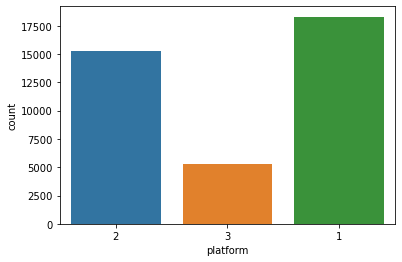

In [27]:
ax = sns.countplot(x="platform", data=df)

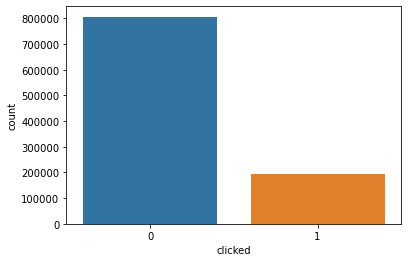

In [28]:
ax = sns.countplot(x="clicked", data=df)

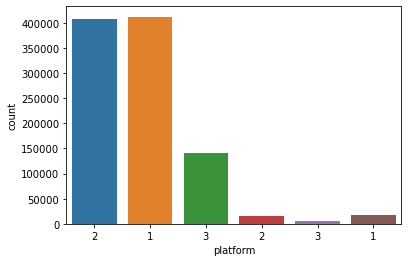

In [61]:
ax = sns.countplot(x="platform", data=df2)

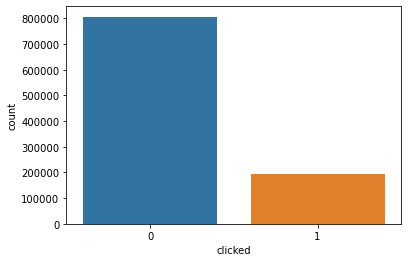

In [62]:
ax = sns.countplot(x="clicked", data=df2)